In [1]:
# Clustering Jerárquico

# Importacion de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

from sklearn.metrics import pairwise_distances

In [2]:
# Incluyendo datos del ejemplo

df = pd.DataFrame()

x = [10, 8, 34, 9, 46, 68]
y = [4, 99, 44, 50, 77, 30]

df['X'] = x
df['Y'] = y

print(df)

    X   Y
0  10   4
1   8  99
2  34  44
3   9  50
4  46  77
5  68  30


In [3]:
dist1 = pairwise_distances(X= df,  metric ='euclidean')
dist2 = pairwise_distances(X= df,  metric ='manhattan')

print(dist1*dist1)
print(dist1)
print(dist2)

[[   0. 9029. 2176. 2117. 6625. 4040.]
 [9029.    0. 3701. 2402. 1928. 8361.]
 [2176. 3701.    0.  661. 1233. 1352.]
 [2117. 2402.  661.    0. 2098. 3881.]
 [6625. 1928. 1233. 2098.    0. 2693.]
 [4040. 8361. 1352. 3881. 2693.    0.]]
[[ 0.         95.0210503  46.64761516 46.01086828 81.39410298 63.56099433]
 [95.0210503   0.         60.8358447  49.01020302 43.9089968  91.43850392]
 [46.64761516 60.8358447   0.         25.70992026 35.11409973 36.76955262]
 [46.01086828 49.01020302 25.70992026  0.         45.80392996 62.29767251]
 [81.39410298 43.9089968  35.11409973 45.80392996  0.         51.89412298]
 [63.56099433 91.43850392 36.76955262 62.29767251 51.89412298  0.        ]]
[[  0.  97.  64.  47. 109.  84.]
 [ 97.   0.  81.  50.  60. 129.]
 [ 64.  81.   0.  31.  45.  48.]
 [ 47.  50.  31.   0.  64.  79.]
 [109.  60.  45.  64.   0.  69.]
 [ 84. 129.  48.  79.  69.   0.]]


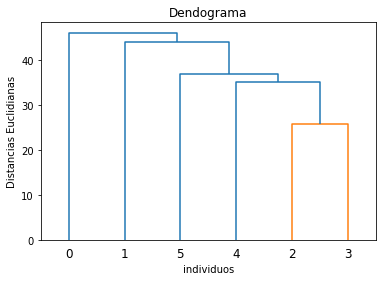

In [4]:
# Creamos el dendograma con el método de enlace simple

dendrogram1 = sch.dendrogram(sch.linkage(df, method = 'single'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

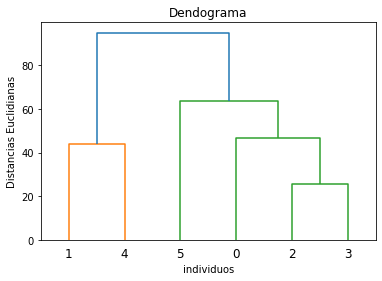

In [5]:
# Creamos el dendograma con el método de enlace completo

dendrogram2 = sch.dendrogram(sch.linkage(df, method = 'complete'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

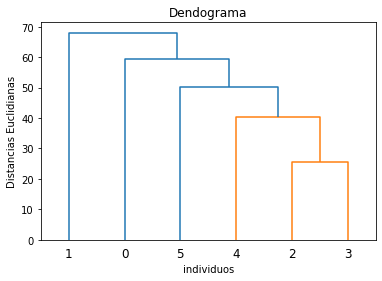

In [7]:
# Creamos el dendograma con el método de enlace promedio

dendrogram3 = sch.dendrogram(sch.linkage(df, method = 'average'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

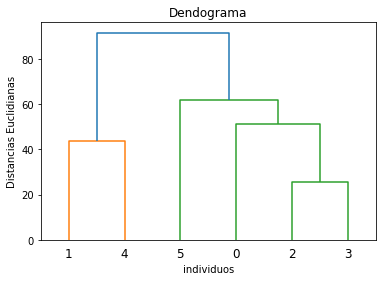

In [10]:
# Creamos el dendograma con el método de enlace ward

dendrogram4 = sch.dendrogram(sch.linkage(df, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('individuos')
plt.ylabel('Distancias Euclidianas')
plt.show()

In [14]:
# Ajustando Clustering Jerárquico al conjunto de datos

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, 
                    affinity = 'euclidean', 
                    linkage = 'ward')

y_hc = hc.fit_predict(df)
print(y_hc)

print(df[y_hc == 0])
print(df[y_hc == 1])
print(df[y_hc == 2])

[0 1 0 0 1 2]
    X   Y
0  10   4
2  34  44
3   9  50
    X   Y
1   8  99
4  46  77
    X   Y
5  68  30


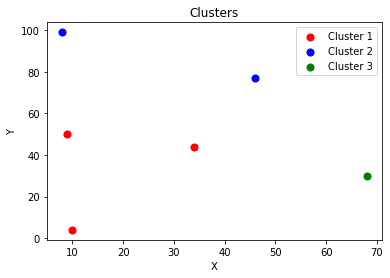

In [15]:
# Visualizacion grafica de los clusters
plt.scatter(df['X'][y_hc == 0], df['Y'][y_hc == 0], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df['X'][y_hc == 1], df['Y'][y_hc == 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df['X'][y_hc == 2], df['Y'][y_hc == 2], s = 50, c = 'green', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [27]:
# Método K-medias

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(df)  
print(y_kmeans)

[0 1 0 0 1 0]


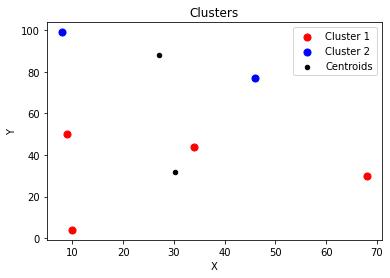

In [28]:
# Visualizacion grafica de los clusters
plt.scatter(df['X'][y_kmeans == 0], df['Y'][y_kmeans == 0], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df['X'][y_kmeans == 1], df['Y'][y_kmeans == 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')

plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()